In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [490]:
league = 'LaLiga'
test = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/{league}/{league}_OU2.5Target.csv')

In [491]:
new = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/cache/{league}/new.csv')


In [492]:
merged = test.merge(new[['GameID', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on='GameID_x', right_on='GameID').drop_duplicates(['GameID'])

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,GameID,O2.5,U2.5,TeamWinOdds,DrawOdds,OpponentWinOdds,avgOverPred,avgUnderPred,impliedOverOdds,impliedUnderOdds,EVO2.5,EVU2.5
0,0,6840,2018-08-10,Man United,Leicester,1,0.52,0.48,6840,Leicester,Man United,1,0.57,0.43,6840,2.03,1.79,1.57,3.90,7.50,0.455,0.545,0.492611,0.558659,-0.07635,-0.02445
2,2,6842,2018-08-11,Newcastle,Tottenham,1,0.70,0.30,6842,Tottenham,Newcastle,1,0.40,0.60,6842,2.01,1.81,3.90,3.50,2.04,0.450,0.550,0.497512,0.552486,-0.09550,-0.00450
4,4,6843,2018-08-11,Chelsea,Huddersfield,1,0.41,0.59,6843,Huddersfield,Chelsea,1,0.54,0.46,6843,1.98,1.84,1.61,4.00,6.50,0.525,0.475,0.505051,0.543478,0.03950,-0.12600
6,6,6844,2018-08-11,Brighton,Watford,0,0.63,0.37,6844,Watford,Brighton,0,0.61,0.39,6844,2.35,1.59,3.40,3.20,2.37,0.380,0.620,0.425532,0.628931,-0.10700,-0.01420
8,8,6847,2018-08-12,Arsenal,Man City,0,0.45,0.55,6847,Man City,Arsenal,0,0.45,0.55,6847,1.55,2.42,4.00,3.80,1.95,0.550,0.450,0.645161,0.413223,-0.14750,0.08900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,3122,8464,2023-09-30,Burnley,Newcastle,0,0.45,0.55,8464,Newcastle,Burnley,0,0.49,0.51,8464,1.53,2.24,9.00,5.75,1.30,0.530,0.470,0.653595,0.446429,-0.18910,0.05280
3124,3124,8465,2023-09-30,Liverpool,Tottenham,1,0.41,0.59,8465,Tottenham,Liverpool,1,0.45,0.55,8465,1.36,3.07,2.15,4.00,2.90,0.570,0.430,0.735294,0.325733,-0.22480,0.32010
3126,3126,8466,2023-09-30,West Ham,Sheffield United,0,0.37,0.63,8466,Sheffield United,West Ham,0,0.40,0.60,8466,1.67,2.20,1.45,4.50,7.00,0.615,0.385,0.598802,0.454545,0.02705,-0.15300
3128,3128,8467,2023-10-01,Brentford,Forest,0,0.45,0.55,8467,Forest,Brentford,0,0.63,0.37,8467,2.10,1.73,2.70,3.10,2.75,0.460,0.540,0.476190,0.578035,-0.03400,-0.06580


In [493]:
merged['avgOverPred'] = (merged['class_1_x'] + merged['class_1_y']) / 2
merged['avgUnderPred'] = (merged['class_0_x'] + merged['class_0_y']) / 2
merged['impliedOverOdds'] = (1 / merged['O2.5'])
merged['impliedUnderOdds'] = (1 / merged['U2.5'])

In [494]:
betAmt = 1
merged['EVO2.5'] = (merged['avgOverPred'] * (merged['O2.5'] * betAmt - betAmt)) - (1 - merged['avgOverPred']) * betAmt 
merged['EVU2.5'] = (merged['avgUnderPred'] * (merged['U2.5'] * betAmt - betAmt)) - (1 - merged['avgUnderPred']) * betAmt 

In [496]:
merged[((merged['EVO2.5'] > 0) & (merged['actual_x'] == 1)) & (merged['avgOverPred'] >= 0.55)].shape[0] / merged[(merged['EVO2.5'] > 0) & (merged['avgOverPred'] >= 0.55)].shape[0]

0.5783783783783784

In [497]:
merged[((merged['EVU2.5'] > 0) & (merged['actual_x'] == 0)) & (merged['avgUnderPred'] >= 0.55)].shape[0] / merged[(merged['EVU2.5'] > 0) & (merged['avgUnderPred'] >= 0.55)].shape[0] 

0.5928571428571429

In [495]:
merged[((merged['EVU2.5'] > 0) & (merged['actual_x'] == 0)) | ((merged['EVO2.5'] > 0) & (merged['actual_x'] == 1))].shape[0] /merged[((merged['EVU2.5'] > 0) | (merged['EVO2.5'] > 0))].shape[0] 

0.4700222057735011

In [498]:
merged

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,GameID,O2.5,U2.5,TeamWinOdds,DrawOdds,OpponentWinOdds,avgOverPred,avgUnderPred,impliedOverOdds,impliedUnderOdds,EVO2.5,EVU2.5
0,0,6080,2018-08-17,Levante,Betis,1,0.50,0.50,6080,Betis,Levante,1,0.38,0.62,6080,1.76,2.06,5.00,4.00,1.66,0.560,0.440,0.568182,0.485437,-0.01440,-0.09360
2,2,6081,2018-08-17,Valladolid,Girona,0,0.40,0.60,6081,Girona,Valladolid,0,0.56,0.44,6081,2.13,1.71,5.00,3.60,1.75,0.520,0.480,0.469484,0.584795,0.10760,-0.17920
4,4,6082,2018-08-18,Espanyol,Celta,0,0.67,0.33,6082,Celta,Espanyol,0,0.53,0.47,6082,2.06,1.76,4.50,3.50,1.85,0.400,0.600,0.485437,0.568182,-0.17600,0.05600
6,6,6083,2018-08-18,Barcelona,Alaves,1,0.22,0.78,6083,Alaves,Barcelona,1,0.09,0.91,6083,1.34,3.18,1.11,10.00,21.00,0.845,0.155,0.746269,0.314465,0.13230,-0.50710
8,8,6084,2018-08-18,Sociedad,Villarreal,1,0.50,0.50,6084,Villarreal,Sociedad,1,0.53,0.47,6084,1.99,1.81,3.80,3.40,2.04,0.485,0.515,0.502513,0.552486,-0.03485,-0.06785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,3932,8054,2023-10-01,Cadiz,Atletico,1,0.42,0.58,8054,Atletico,Cadiz,1,0.34,0.66,8054,1.73,2.07,10.00,5.00,1.33,0.620,0.380,0.578035,0.483092,0.07260,-0.21340
3934,3934,8055,2023-10-01,Valencia,Betis,1,0.61,0.39,8055,Betis,Valencia,1,0.69,0.31,8055,2.10,1.65,3.30,3.25,2.30,0.350,0.650,0.476190,0.606061,-0.26500,0.07250
3936,3936,8056,2023-10-01,Alaves,Osasuna,0,0.52,0.48,8056,Osasuna,Alaves,0,0.50,0.50,8056,2.50,1.48,2.75,3.00,2.80,0.490,0.510,0.400000,0.675676,0.22500,-0.24520
3938,3938,8057,2023-10-01,Almeria,Granada,1,0.46,0.54,8057,Granada,Almeria,1,0.54,0.46,8057,1.73,2.18,1.95,3.60,3.75,0.500,0.500,0.578035,0.458716,-0.13500,0.09000


In [499]:
def calculate_profit(merged, bankroll, pred_type):
    if pred_type == 'OU2.5Target':
        ev = ['EVO2.5', 'EVU2.5']
        target = ['O2.5', 'U2.5']
        prob = ['avgOverPred', 'avgUnderPred']
    profit_graph = []
    bank_graph = []
    print(merged.shape[0])
    for i in range(merged.shape[0]):
        #ev = [(merged.iloc[i, merged.columns.get_loc('avgOverPred') * (merged.iloc[i, merged.columns.get_loc('O2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgOverPred')) * betAmt, (merged.iloc[i, merged.columns.get_loc('avgUnderPred') * (merged.iloc[i, merged.columns.get_loc('U2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgUnderPred')) * betAmt]
        if merged.iloc[i, merged.columns.get_loc(ev[0])] > 0 and merged.iloc[i, merged.columns.get_loc(prob[0])] > 0.6:
            b = merged.iloc[i, merged.columns.get_loc(target[0])] - 1
            p = merged.iloc[i, merged.columns.get_loc(prob[0])]
            #bet = ((b * p - (1-p)) / b) * bankroll / 2#0.02 * bankroll
            et = 1.01 * bankroll
            bet = 10
            protential_profit = (bet * merged.iloc[i, merged.columns.get_loc(target[0])] - bet)# * merged.loc[i, ['actual_x']]
            if merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet
       
        elif merged.iloc[i, merged.columns.get_loc(ev[1])] > 0 and merged.iloc[i, merged.columns.get_loc(prob[1])] > 0.6:
            b = merged.iloc[i, merged.columns.get_loc(target[1])] - 1
            p = merged.iloc[i, merged.columns.get_loc(prob[1])]
            #bet = ((b * p - (1-p)) / b) * bankroll / 2#0.02 * bankroll
            et = 1.01 * bankroll
            bet = 10
            protential_profit = (bet * merged.iloc[i, merged.columns.get_loc(target[1])] - bet)# * merged.loc[i, ['actual_x']]
            if not merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet
        else:
            actual_profit = 0
        
        
            
        
        bankroll += actual_profit
        #print(merged.iloc[i, merged.columns.get_loc('Date')], protential_profit, actual_profit, bankroll)
        bank_graph.append(bankroll)
        profit_graph.append(profit)
    return bank_graph, profit_graph, bankroll

bank_graph, profit_graph, bankroll = calculate_profit(merged, 1000, 'OU2.5Target')



1971


In [500]:
bankroll

1013.3999999999993

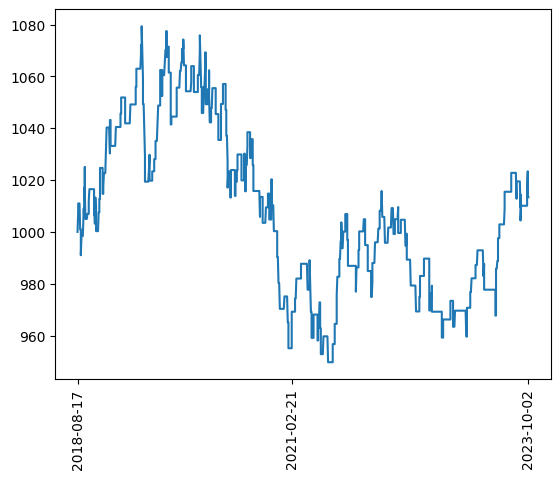

In [501]:
fig, ax = plt.subplots()
dates = np.array(merged['Date'])
ax.plot(dates, bank_graph)
ax.tick_params(axis='x',rotation=90)
date_range = [dates[0], dates[len(dates)//2],dates[-1]]#pd.date_range(dates[0], dates[-1], periods = 10).date
#print(list(date_range))
ax.set_xticks(list(date_range))#,dates[300]] dates[600], dates[700], dates[900]])
plt.show()

In [53]:
test1 = pd.read_csv('/Users/Gautham/Projects/sports_betting/Testing/PremierLeague/PremierLeague_WinTarget.csv')
merged1 = test1.merge(new[['GameID', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on='GameID_x', right_on='GameID').drop_duplicates(['GameID'])

In [56]:
merged1['avgTeamWinPred'] = (merged1['class_1_x'] + merged1['class_1_y']) / 2
merged1['avgOpponentWinPred'] = (merged1['class_0_x'] + merged1['class_0_y']) / 2
merged1['impliedTeamWinOdds'] = (1 / merged1['TeamWinOdds'])
merged1['impliedOpponentWinOdds'] = (1 / merged1['OpponentWinOdds'])

In [59]:
merged1['EVTeamWin'] = (merged1['avgTeamWinPred'] * (merged1['TeamWinOdds'] * betAmt - betAmt)) - (1 - merged1['avgTeamWinPred']) * betAmt 
merged1['EVOpponentWin'] = (merged1['avgOpponentWinPred'] * (merged1['OpponentWinOdds'] * betAmt - betAmt)) - (1 - merged1['avgOpponentWinPred']) * betAmt 

In [61]:
merged1

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,GameID,O2.5,U2.5,TeamWinOdds,DrawOdds,OpponentWinOdds,avgTeamWinPred,avgOpponentWinPred,impliedTeamWinOdds,impliedOpponentWinOdds,EVTeamWin,EVOpponentWin
0,0,6840,2018-08-10,Leicester,Man United,0,0.87,0.13,6840,Man United,Leicester,1,0.46,0.54,6840,2.03,1.79,7.50,3.90,1.57,0.335,0.665,0.133333,0.636943,15.1250,0.4405
2,2,6842,2018-08-11,Tottenham,Newcastle,1,0.54,0.46,6842,Newcastle,Tottenham,0,0.54,0.46,6842,2.01,1.81,2.04,3.50,3.90,0.460,0.540,0.490196,0.256410,-0.6160,11.0600
4,4,6843,2018-08-11,Huddersfield,Chelsea,0,0.88,0.12,6843,Chelsea,Huddersfield,1,0.42,0.58,6843,1.98,1.84,6.50,4.00,1.61,0.350,0.650,0.153846,0.621118,12.7500,0.4650
6,6,6844,2018-08-11,Brighton,Watford,0,0.61,0.39,6844,Watford,Brighton,1,0.60,0.40,6844,2.35,1.59,3.40,3.20,2.37,0.395,0.605,0.294118,0.421941,3.4300,4.3385
8,8,6847,2018-08-12,Man City,Arsenal,1,0.61,0.39,6847,Arsenal,Man City,0,0.79,0.21,6847,1.55,2.42,1.95,3.80,4.00,0.300,0.700,0.512821,0.250000,-4.1500,18.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,3122,8464,2023-09-30,Newcastle,Burnley,1,0.29,0.71,8464,Burnley,Newcastle,0,0.99,0.01,8464,1.53,2.24,1.30,5.75,9.00,0.360,0.640,0.769231,0.111111,-5.3200,47.6000
3124,3124,8465,2023-09-30,Tottenham,Liverpool,1,0.59,0.41,8465,Liverpool,Tottenham,0,0.49,0.51,8465,1.36,3.07,2.90,4.00,2.15,0.460,0.540,0.344828,0.465116,3.3400,1.6100
3126,3126,8466,2023-09-30,Man City,Wolves,0,0.28,0.72,8466,Wolves,Man City,1,0.89,0.11,8466,1.53,2.23,1.33,5.75,8.00,0.415,0.585,0.751880,0.125000,-4.4805,36.8000
3128,3128,8467,2023-10-01,Forest,Brentford,0,0.63,0.37,8467,Brentford,Forest,0,0.65,0.35,8467,2.10,1.73,2.75,3.10,2.70,0.360,0.640,0.363636,0.370370,-0.1000,7.2800


In [69]:
merged1[((merged1['EVTeamWin'] > 0) & (merged1['actual_x'] == 1))].shape[0]# / merged1[(merged1['EVTeamWin'] > 0)].shape[0] 

172

In [71]:
merged1[((merged1['EVOpponentWin'] > 0) & (merged1['actual_x'] == 0))].shape[0]

692